# Mouvement : Ramasser objet 
## Data : Patients lombaligues et volontaires sains 

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

In [80]:
os.chdir('C:\\Users\\Eya\\Desktop\\Xsens\\LOMBALGIE\\sujets_lombalgiques_mars_2022\\PRE')
#La méthode Python os.chdir() remplace le répertoire de travail actuel par le chemin donné.

In [81]:
#La liste files contient les noms des fichiers cotenant les données des sujets lombalgiques

Files=['LIEURAIN\\LIEURAIN-006.xlsx','BUTSCHER\\BUTSCHER-005.xlsx','ADJADJ\\ramasser_un_object_001.xlsx','BENHAMMADI\\RamaserObjet.xlsx','GIMENO\\GIMEMO-005.xlsx']

In [82]:
#Ce bloc concerne les données des personnes lombalgiques


VM=[]
AM=[]
VAM=[]
AAM=[]
CMM=[]
VCMM=[]
ACMM=[]
AT1M=[]
AT2M=[]


#Toutes les listes initialisés à [], prenderont les valeurs quadratiques moyennes des paramétres suivants : 
#vitesse, accélération, vitesse angulaire, accélération angulaire, centre de masse, vitesse de centre de masse, 
#accélération de centre de masse, angle 1 et angle2.

#Les angles 1 et 2 correspondent au ROM, qui est l'Amplitude du mouvement (de l’anglais Range Of Motion).
#Elles renseignent sur la capacité d’une articulation à effectuer l’ensemble de ses mouvements.

#Pour le mouvement "Extension du rachis", les deux angles sont : "Angle de flexion maximal entre la verticale et le pelvis",
#et "Angle d’extension maximal entre la verticale et le thorax (T8)".


for i in range (len(Files)) :
    File=Files[i]
    vitesse=pd.read_excel(File, sheet_name ="Segment Velocity")
    acceleration=pd.read_excel(File, sheet_name ="Segment Acceleration")
    vitesse_angulaire=pd.read_excel(File, sheet_name ="Segment Angular Velocity")
    acceleration_angulaire=pd.read_excel(File, sheet_name ="Segment Angular Acceleration")
    centre_mass=pd.read_excel(File, sheet_name ="Center of Mass")
    angles=pd.read_excel(File, sheet_name ="Ergonomic Joint Angles ZXY")

    
# A chaque fichier de la liste Files, les sheets à utiliser sont extractés dans des variables.
    
    
    vitesse.drop( vitesse[ (vitesse['Frame'] > 3000) ].index, inplace=True)
    acceleration.drop( acceleration[ (acceleration['Frame'] > 3000) ].index, inplace=True)
    vitesse_angulaire.drop( vitesse_angulaire[ (vitesse_angulaire['Frame'] > 3000) ].index, inplace=True)
    acceleration_angulaire.drop( acceleration_angulaire[ (acceleration_angulaire['Frame'] > 3000) ].index, inplace=True)
    centre_mass.drop( centre_mass[ (centre_mass['Frame'] > 3000) ].index, inplace=True)
    angles.drop( angles[ (angles['Frame'] > 3000) ].index, inplace=True)

    
# Nous avons fixés la valeur maximale des frames dans chaque fichier à 3000, pour que tous les fichiers soient de meme taille.   
    
    
    Frame=vitesse.loc[:,'Frame']

    
    V1=vitesse.loc[:,vitesse.columns[13]] #Velocity of T8
    V2=vitesse.loc[:,vitesse.columns[14]]
    V3=vitesse.loc[:,vitesse.columns[15]]
 
# On extracte dans V1, les vitesses correspondantes à l'axe des x, dans V2 celles correspondantes à l'axe des y et dans V3
#celles correspondantes à l'axe des z.

# De meme pour les autres
    A1=acceleration.loc[:,acceleration.columns[13]] #Acceleration of T8
    A2=acceleration.loc[:,acceleration.columns[14]]
    A3=acceleration.loc[:,acceleration.columns[15]]

    
    VA1=vitesse_angulaire.loc[:,vitesse_angulaire.columns[13]] #Angular Velocity of T8
    VA2=vitesse_angulaire.loc[:,vitesse_angulaire.columns[14]]
    VA3=vitesse_angulaire.loc[:,vitesse_angulaire.columns[15]]
    
    
    AA1=acceleration_angulaire.loc[:,acceleration_angulaire.columns[13]] #Angular acceleration of T8
    AA2=acceleration_angulaire.loc[:,acceleration_angulaire.columns[14]]
    AA3=acceleration_angulaire.loc[:,acceleration_angulaire.columns[15]]
    
    
    CM1=centre_mass.loc[:,centre_mass.columns[1]] #Center of Mass 
    CM2=centre_mass.loc[:,centre_mass.columns[2]]
    CM3=centre_mass.loc[:,centre_mass.columns[3]]
    
    VCM1=centre_mass.loc[:,centre_mass.columns[4]] #Velocity of Center of Mass 
    VCM2=centre_mass.loc[:,centre_mass.columns[5]]
    VCM3=centre_mass.loc[:,centre_mass.columns[6]]
    
    ACM1=centre_mass.loc[:,centre_mass.columns[7]] #Acceleration of Center of Mass 
    ACM2=centre_mass.loc[:,centre_mass.columns[8]]
    ACM3=centre_mass.loc[:,centre_mass.columns[9]]
    
    

    AT1=angles.loc[:,angles.columns[12]] #Angles of T8
    AT2=angles.loc[:,angles.columns[15]] 
    
    
    AT1M.append(np.max(AT1))
    AT2M.append(np.max(AT2))
    
    
    V=[]
    A=[]
    VA=[]
    AA=[]
    CM=[]
    VCM=[]
    ACM=[]
    

    for  k in range(len(V1)) :
        V.append (np.sqrt (V1[k] * V1[k] + V2[k] *V2[k] + V3[k] *V3[k]))
    mean = np.mean(V)
    VM.append(mean)
    
# VM contient les vitesses quadratiques moyennes
# De meme pour les autres    
    
    for  k in range(len(A1)) :
        A.append (np.sqrt (A1[k] * A1[k] + A2[k] *A2[k] + A3[k] *A3[k]))
    mean = np.mean(A)
    AM.append(mean)

    
    for  k in range(len(VA1)) :
        VA.append (np.sqrt (VA1[k] * VA1[k] + VA2[k] *VA2[k] + VA3[k] *VA3[k]))
    mean = np.mean(VA)
    VAM.append(mean)
    
    
    for  k in range(len(AA1)) :
        AA.append (np.sqrt (AA1[k] * AA1[k] + AA2[k] *AA2[k] + AA3[k] *AA3[k]))
    mean = np.mean(AA)
    AAM.append(mean)
    
    
    for  k in range(len(CM1)) :
        CM.append (np.sqrt (CM1[k] * CM1[k] + CM2[k] *CM2[k] + CM3[k] *CM3[k]))
    mean = np.mean(CM)
    CMM.append(mean)
    
    for  k in range(len(VCM1)) :
        VCM.append (np.sqrt (VCM1[k] * VCM1[k] + VCM2[k] *VCM2[k] + VCM3[k] *VCM3[k]))
    mean = np.mean(VCM)
    VCMM.append(mean)
    
    for  k in range(len(ACM1)) :
        ACM.append (np.sqrt (ACM1[k] * ACM1[k] + ACM2[k] *ACM2[k] + ACM3[k] *ACM3[k]))
    mean = np.mean(ACM)
    ACMM.append(mean)
    
    

In [83]:
os.chdir('C:\\Users\\Eya\\Desktop\\Xsens\\LOMBALGIE\\SUJETS_SAINS')

In [84]:
Files=['thierry\\thierry-006.xlsx' , 'Unai G\\Unai-007.xlsx' , 'Isabel Tavares\\RamasserObjet_001.xlsx','estelle ARGOTTI\\estelle-008.xlsx' , 'Barbara Rider\\TEST-005.xlsx']

In [85]:
#Ce bloc concerne les données des personnes sains 

# Le meme démarche a été fait comme le bloc précédent.

for i in range (len(Files)) :
    File=Files[i]
    vitesse=pd.read_excel(File, sheet_name ="Segment Velocity")
    acceleration=pd.read_excel(File, sheet_name ="Segment Acceleration")
    vitesse_angulaire=pd.read_excel(File, sheet_name ="Segment Angular Velocity")
    acceleration_angulaire=pd.read_excel(File, sheet_name ="Segment Angular Acceleration")
    centre_mass=pd.read_excel(File, sheet_name ="Center of Mass")
    angles=pd.read_excel(File, sheet_name ="Ergonomic Joint Angles ZXY")
    
    
    
    
    vitesse.drop( vitesse[ (vitesse['Frame'] > 3000) ].index, inplace=True)
    acceleration.drop( acceleration[ (acceleration['Frame'] > 3000) ].index, inplace=True)
    vitesse_angulaire.drop( vitesse_angulaire[ (vitesse_angulaire['Frame'] > 3000) ].index, inplace=True)
    acceleration_angulaire.drop( acceleration_angulaire[ (acceleration_angulaire['Frame'] > 3000) ].index, inplace=True)
    centre_mass.drop( centre_mass[ (centre_mass['Frame'] > 3000) ].index, inplace=True)
    angles.drop( angles[ (angles['Frame'] > 3000) ].index, inplace=True)
    
    Frame=vitesse.loc[:,'Frame']

    
    V1=vitesse.loc[:,vitesse.columns[13]] #Velocity of T8
    V2=vitesse.loc[:,vitesse.columns[14]]
    V3=vitesse.loc[:,vitesse.columns[15]]
    
    A1=acceleration.loc[:,acceleration.columns[13]] #Acceleration of T8
    A2=acceleration.loc[:,acceleration.columns[14]]
    A3=acceleration.loc[:,acceleration.columns[15]]

    
    VA1=vitesse_angulaire.loc[:,vitesse_angulaire.columns[13]] #Angular Velocity of T8
    VA2=vitesse_angulaire.loc[:,vitesse_angulaire.columns[14]]
    VA3=vitesse_angulaire.loc[:,vitesse_angulaire.columns[15]]
    
    
    AA1=acceleration_angulaire.loc[:,acceleration_angulaire.columns[13]] #Angular acceleration of T8
    AA2=acceleration_angulaire.loc[:,acceleration_angulaire.columns[14]]
    AA3=acceleration_angulaire.loc[:,acceleration_angulaire.columns[15]]
    
    
    CM1=centre_mass.loc[:,centre_mass.columns[1]] #Center of Mass 
    CM2=centre_mass.loc[:,centre_mass.columns[2]]
    CM3=centre_mass.loc[:,centre_mass.columns[3]]
    
    #VCM1=centre_mass.loc[:,centre_mass.columns[4]] #Velocity of Center of Mass 
    #VCM2=centre_mass.loc[:,centre_mass.columns[5]]
    #VCM3=centre_mass.loc[:,centre_mass.columns[6]]
    
    #ACM1=centre_mass.loc[:,centre_mass.columns[7]] #Acceleration of Center of Mass 
    #ACM2=centre_mass.loc[:,centre_mass.columns[8]]
    #ACM3=centre_mass.loc[:,centre_mass.columns[9]]
    
    

    AT1=angles.loc[:,angles.columns[12]] #Angles of T8
    AT2=angles.loc[:,angles.columns[15]] 
    
    
    AT1M.append(np.max(AT1))
    AT2M.append(np.max(AT2))
    
    
    V=[]
    A=[]
    VA=[]
    AA=[]
    CM=[]
    #VCM=[]
    #ACM=[]
    

    for  k in range(len(V1)) :
        V.append (np.sqrt (V1[k] * V1[k] + V2[k] *V2[k] + V3[k] *V3[k]))
    mean = np.mean(V)
    VM.append(mean)
    
    
    for  k in range(len(A1)) :
        A.append (np.sqrt (A1[k] * A1[k] + A2[k] *A2[k] + A3[k] *A3[k]))
    mean = np.mean(A)
    AM.append(mean)

    
    for  k in range(len(VA1)) :
        VA.append (np.sqrt (VA1[k] * VA1[k] + VA2[k] *VA2[k] + VA3[k] *VA3[k]))
    mean = np.mean(VA)
    VAM.append(mean)
    
    
    for  k in range(len(AA1)) :
        AA.append (np.sqrt (AA1[k] * AA1[k] + AA2[k] *AA2[k] + AA3[k] *AA3[k]))
    mean = np.mean(AA)
    AAM.append(mean)
    
    
    for  k in range(len(CM1)) :
        CM.append (np.sqrt (CM1[k] * CM1[k] + CM2[k] *CM2[k] + CM3[k] *CM3[k]))
    mean = np.mean(CM)
    CMM.append(mean)
    
    #for  k in range(len(VCM1)) :
    #    VCM.append (np.sqrt (VCM1[k] * VCM1[k] + VCM2[k] *VCM2[k] + VCM3[k] *VCM3[k]))
    #mean = np.mean(VCM)
    #VCMM.append(mean)
    #
    #for  k in range(len(ACM1)) :
    #    ACM.append (np.sqrt (ACM1[k] * ACM1[k] + ACM2[k] *ACM2[k] + ACM3[k] *ACM3[k]))
    #mean = np.mean(ACM)
    #ACMM.append(mean)
    
    

### Construction de la base de données

In [86]:
# Création de la colonne Personne
columns = ['Personne']
index = [1,2,3,4,5,6,7,8,9,10]
data = [1,2,3,4,5,6,7,8,9,10]
df = pd.DataFrame(data=data,index=index,columns=columns)
df

,Personne
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9
10,10


In [87]:
# Création des autres colonnes de la base

df['Vitesse quadratique moyenne'] = VM
df['Accéleration quadratique moyenne']=AM
df['vitesse angulaire moyenne']=VAM
df['acceleration angulaire moyenne']=AAM
df['centre de masse moyen']=CMM
#df['vitesse de centre de masse moyenne']=VCMM
#f['acceleration de centre de masse moyenne']=ACMM
df['angle1']=AT1M
df['angle2']=AT2M

In [88]:
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,vitesse angulaire moyenne,acceleration angulaire moyenne,centre de masse moyen,angle1,angle2
1,1,0.309717,2.324743,0.961252,13.105137,2.061353,38.097823,67.563638
2,2,0.346792,3.042439,0.950827,15.776819,2.694822,38.902921,55.781627
3,3,0.252515,1.544764,0.697499,6.878438,2.110760,36.872622,60.958682
4,4,0.229609,1.213279,0.755103,6.520585,2.201865,8.034194,49.999348
5,5,0.256816,1.462396,0.725878,6.553155,1.964760,35.202642,51.602914
6,6,0.312693,1.809343,1.279732,10.711041,0.951739,39.748834,76.239061
7,7,0.324292,1.655714,0.977204,7.226874,0.835907,65.869120,35.063579
8,8,0.284150,1.169990,1.189107,5.502010,0.833778,54.889440,72.302453
9,9,0.341471,1.870542,1.111466,6.257103,0.919386,30.941184,61.715234
10,10,0.276002,0.970289,1.084537,4.460569,1.467946,58.981660,55.344376


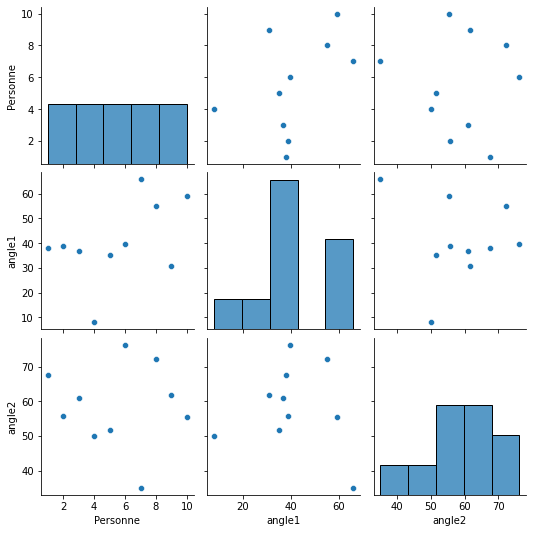

In [89]:
# Tracer la relation entre les deux angles

sns.pairplot(df[['Personne','angle1','angle2']])

In [90]:
#df.drop(columns=['vitesse angulaire moyenne','acceleration angulaire moyenne'],inplace=True)
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,vitesse angulaire moyenne,acceleration angulaire moyenne,centre de masse moyen,angle1,angle2
1,1,0.309717,2.324743,0.961252,13.105137,2.061353,38.097823,67.563638
2,2,0.346792,3.042439,0.950827,15.776819,2.694822,38.902921,55.781627
3,3,0.252515,1.544764,0.697499,6.878438,2.110760,36.872622,60.958682
4,4,0.229609,1.213279,0.755103,6.520585,2.201865,8.034194,49.999348
5,5,0.256816,1.462396,0.725878,6.553155,1.964760,35.202642,51.602914
6,6,0.312693,1.809343,1.279732,10.711041,0.951739,39.748834,76.239061
7,7,0.324292,1.655714,0.977204,7.226874,0.835907,65.869120,35.063579
8,8,0.284150,1.169990,1.189107,5.502010,0.833778,54.889440,72.302453
9,9,0.341471,1.870542,1.111466,6.257103,0.919386,30.941184,61.715234
10,10,0.276002,0.970289,1.084537,4.460569,1.467946,58.981660,55.344376


## Standardisation des données

In [91]:
df.mean(axis=0) #moyenne par colonne

Personne                             5.500000
Vitesse quadratique moyenne          0.293406
Accéleration quadratique moyenne     1.706350
vitesse angulaire moyenne            0.973260
acceleration angulaire moyenne       8.299173
centre de masse moyen                1.604232
angle1                              40.754044
angle2                              58.657091
dtype: float64

In [92]:
df.std(axis=0) #écartype par colonne

Personne                             3.027650
Vitesse quadratique moyenne          0.039752
Accéleration quadratique moyenne     0.611545
vitesse angulaire moyenne            0.199303
acceleration angulaire moyenne       3.665741
centre de masse moyen                0.686321
angle1                              16.285915
angle2                              11.971781
dtype: float64

In [93]:
dt = (df - df.mean(axis=0)) / (df.std(axis=0))  # pour la standardisation de la dataframe
dt

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,vitesse angulaire moyenne,acceleration angulaire moyenne,centre de masse moyen,angle1,angle2
1,-1.486301,0.410331,1.011198,-0.060251,1.311048,0.666047,-0.163099,0.743962
2,-1.156012,1.342982,2.184777,-0.112561,2.039873,1.589040,-0.113664,-0.240187
3,-0.825723,-1.028664,-0.264226,-1.383627,-0.387571,0.738035,-0.238330,0.192251
4,-0.495434,-1.604884,-0.806272,-1.094601,-0.485192,0.870780,-2.009089,-0.723179
5,-0.165145,-0.920449,-0.398915,-1.241239,-0.476307,0.525306,-0.340871,-0.589234
6,0.165145,0.485192,0.168415,1.537714,0.657948,-0.950712,-0.061723,1.468618
7,0.495434,0.776975,-0.082800,0.019787,-0.292519,-1.119484,1.542135,-1.970760
8,0.825723,-0.232827,-0.877057,1.083008,-0.763055,-1.122586,0.867952,1.139794
9,1.156012,1.209141,0.268488,0.693443,-0.557069,-0.997851,-0.602537,0.255446
10,1.486301,-0.437798,-1.203608,0.558326,-1.047156,-0.198575,1.119226,-0.276710


In [94]:
dt.mean(axis=0)

Personne                            0.000000e+00
Vitesse quadratique moyenne         6.605827e-16
Accéleration quadratique moyenne    1.998401e-16
vitesse angulaire moyenne          -2.220446e-16
acceleration angulaire moyenne     -2.220446e-17
centre de masse moyen              -2.137179e-16
angle1                              0.000000e+00
angle2                              9.603429e-16
dtype: float64

In [95]:
dt.std(axis=0) #Les écartypes des colonnes sont bien égales à 1

Personne                            1.0
Vitesse quadratique moyenne         1.0
Accéleration quadratique moyenne    1.0
vitesse angulaire moyenne           1.0
acceleration angulaire moyenne      1.0
centre de masse moyen               1.0
angle1                              1.0
angle2                              1.0
dtype: float64

# Apprentissage non supervisé
## Application du modéle KMeans

In [96]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
model = KMeans(n_clusters=2) #KMeans avec 2 groupes
model.fit(dt) # fit du  Training set

KMeans(n_clusters=2)

In [98]:
model.labels_  #affiche le numéro de cluster affectés aux groupes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [99]:
np.unique(model.labels_,return_counts=True) #effectifs par groupe 

(array([0, 1]), array([5, 5], dtype=int64))

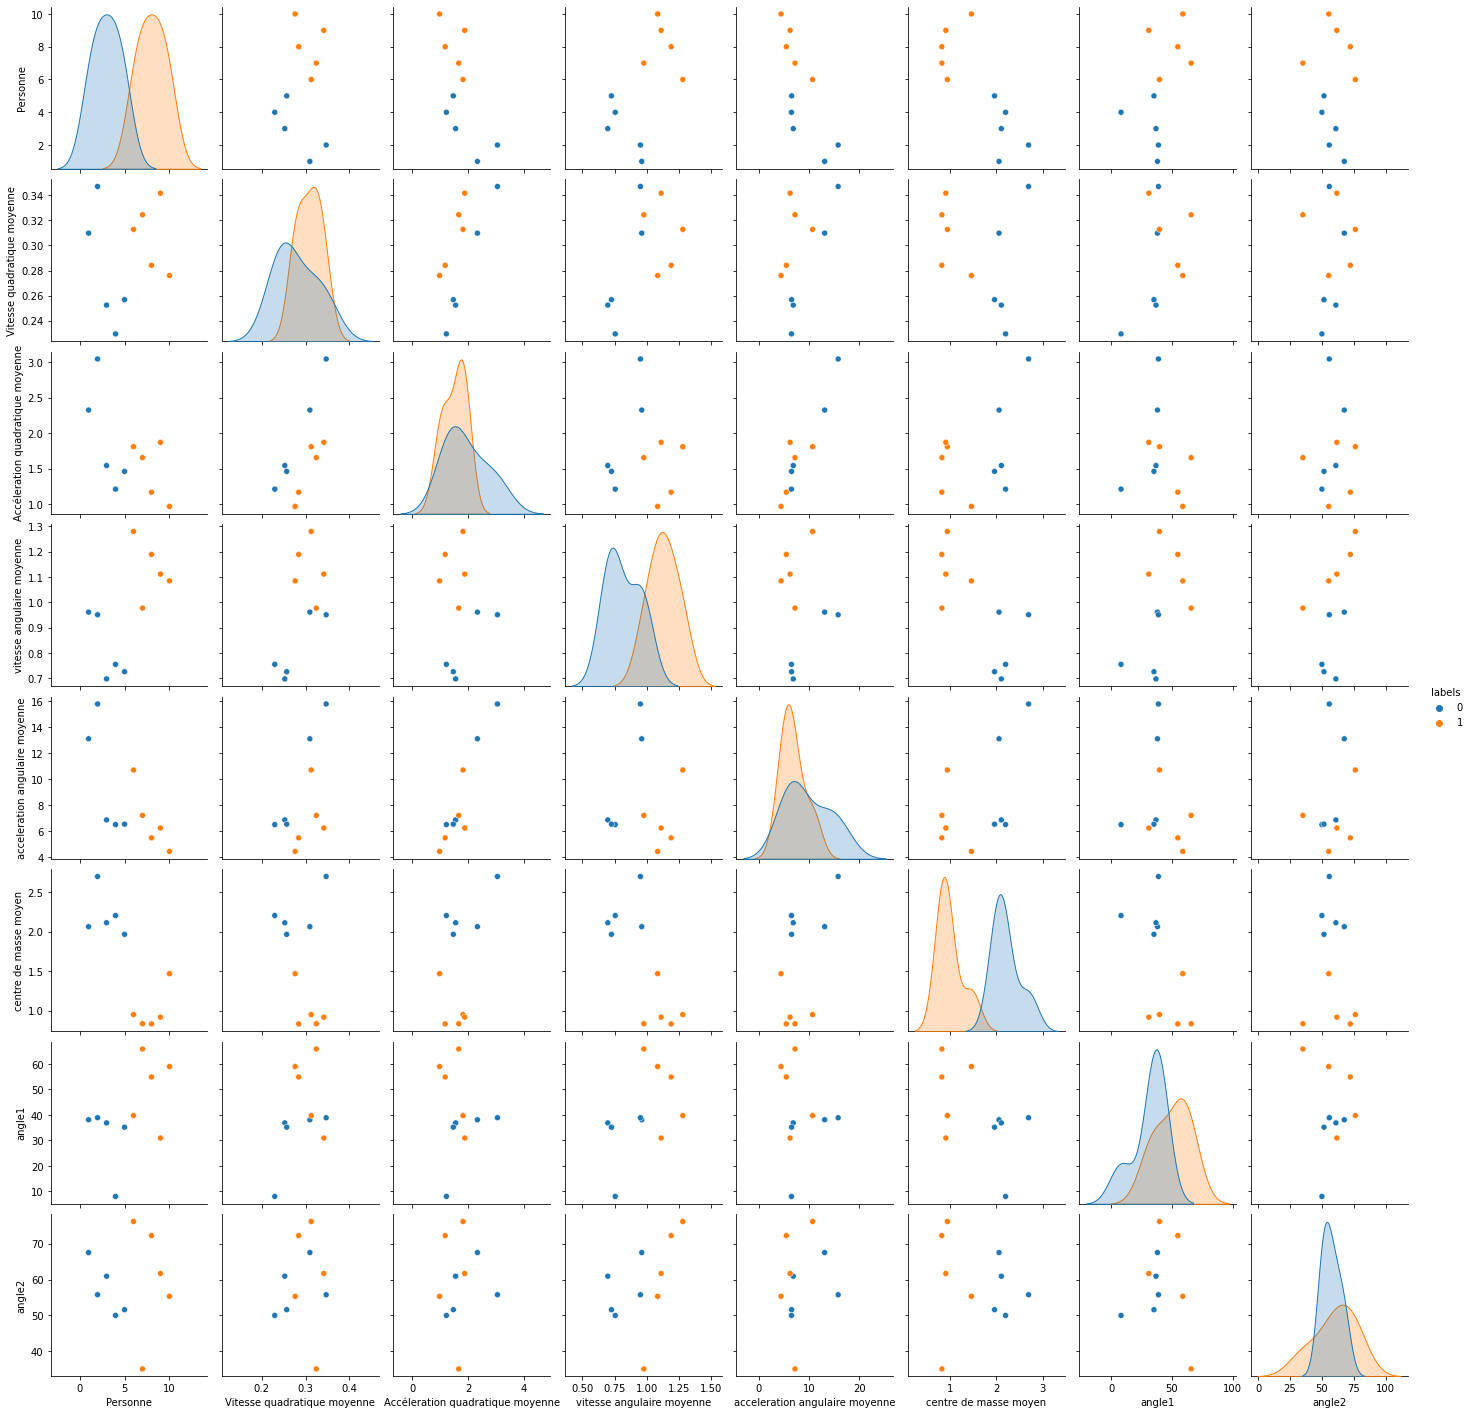

In [100]:
c=df.copy()
c['labels']=model.labels_
sns.pairplot(c,hue="labels")  #colorier les points dans le pairplot selon la classe

# Apprentissage supervisé

In [190]:
classe=[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Ajout de la colonne classe, qui sera le target dans notre apprentissage
# 0 : indique malade 
# 1 : indique sain

In [191]:
df['classe']=classe
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,vitesse angulaire moyenne,acceleration angulaire moyenne,centre de masse moyen,angle1,angle2,classe
1,1,0.309717,2.324743,0.961252,13.105137,2.061353,38.097823,67.563638,0
2,2,0.346792,3.042439,0.950827,15.776819,2.694822,38.902921,55.781627,0
3,3,0.252515,1.544764,0.697499,6.878438,2.110760,36.872622,60.958682,0
4,4,0.229609,1.213279,0.755103,6.520585,2.201865,8.034194,49.999348,0
5,5,0.256816,1.462396,0.725878,6.553155,1.964760,35.202642,51.602914,0
6,6,0.312693,1.809343,1.279732,10.711041,0.951739,39.748834,76.239061,1
7,7,0.324292,1.655714,0.977204,7.226874,0.835907,65.869120,35.063579,1
8,8,0.284150,1.169990,1.189107,5.502010,0.833778,54.889440,72.302453,1
9,9,0.341471,1.870542,1.111466,6.257103,0.919386,30.941184,61.715234,1
10,10,0.276002,0.970289,1.084537,4.460569,1.467946,58.981660,55.344376,1


In [208]:
# Particition de la base en target y (classe) et données x 

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#spliting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [209]:
y_train=model.fit(x_train) # fit du  Training set 
y_pred= model.predict(x_test) # tester le modéle en predire les targets test

In [210]:
accurancy=np.sum(y_pred==y_test)/len(y_test) # Performance du modéle

In [211]:
print(accurancy)

0.75


In [212]:
y_pred

array([0, 0, 0, 1])

In [213]:
y_test

array([0, 1, 0, 1], dtype=int64)

## Modéle SVM

In [214]:
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,vitesse angulaire moyenne,acceleration angulaire moyenne,centre de masse moyen,angle1,angle2,classe
1,1,0.309717,2.324743,0.961252,13.105137,2.061353,38.097823,67.563638,0
2,2,0.346792,3.042439,0.950827,15.776819,2.694822,38.902921,55.781627,0
3,3,0.252515,1.544764,0.697499,6.878438,2.110760,36.872622,60.958682,0
4,4,0.229609,1.213279,0.755103,6.520585,2.201865,8.034194,49.999348,0
5,5,0.256816,1.462396,0.725878,6.553155,1.964760,35.202642,51.602914,0
6,6,0.312693,1.809343,1.279732,10.711041,0.951739,39.748834,76.239061,1
7,7,0.324292,1.655714,0.977204,7.226874,0.835907,65.869120,35.063579,1
8,8,0.284150,1.169990,1.189107,5.502010,0.833778,54.889440,72.302453,1
9,9,0.341471,1.870542,1.111466,6.257103,0.919386,30.941184,61.715234,1
10,10,0.276002,0.970289,1.084537,4.460569,1.467946,58.981660,55.344376,1


In [215]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#spliting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/2, random_state=0)

In [216]:
# Fit du  Training set
from sklearn.svm import SVC
model2 = SVC(kernel = 'linear', random_state = 0)
model2.fit(X_train, y_train)

#Prediction sur le Test set
y_pred = model2.predict(X_test)

In [217]:
accurancy=np.sum(y_pred==y_test)/len(y_test)
print(accurancy)

0.8


## Modéle Regréssion Logistique

In [218]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#spliting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [219]:
model3 = LogisticRegression (tol =0.1)

In [220]:
model3.fit(X_train,y_train)

LogisticRegression(tol=0.1)

In [221]:
y_predict=model3.predict(X_test)
y_predict

array([1, 0, 0], dtype=int64)

In [222]:
y_test = np.array(y_test)
y_test

array([1, 0, 1], dtype=int64)

In [223]:
accurancy=np.sum(y_predict==y_test)/len(y_test)
accurancy

0.6666666666666666